In [53]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score

## Binary Logistic Regression

Logistic regression is named for the function used at the core of the method, the **logistic function**. In linear regression, the outcome (dependent variable) is continuous through $\theta^Tx$. It can have any one of an infinite number of possible values. 

In logistic regression, the outcome (dependent variable) has only a limited number of possible values. Logistic Regression is used when response variable is categorical in nature. If we can find one function $g$ such that 
$$
    g(\theta^Tx) = [0, 1]
$$

The logistic function, also called the **sigmoid function** is an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$$ h = g(\theta^Tx)  = \frac{1}{1+e^{-x}} $$

Where $e$ is the base of the natural logarithms and value is the actual numerical value that you want to transform. The $e$ is a really convenient number for math, for example Whenever you take the derivative of $e^x$, you get $e^x$ back again.  It's the only function on Earth that will do that.

Logistic regression uses an equation as the representation, similar to linear regression. The central premise of Logistic Regression is the assumption that your input space can be separated into two nice ‘regions’, one for each class, by a linear boundary. However, in more complicated case, we may prefer other activation function. 

1. *Sigmoid function has small gradients (max of 0.25) and hence may slow down the learning. This happens especially in a neural network, where a chain of small gradients can greatly reduce the gradient to near zero, the problem so called vanishing gradients.*
2. *Sigmoid function has almost zero gradients when $x$ is moving above 4 or below -4, thus if we use sigmoid function, it is possible that our gradient descent update is performing almost no learning!*

To solve these problems, in the future complicated case, we shall use other activation function that has stronger gradients but also maintain a squashing property of squashing continuous values to discrete. Other activation functions include: Tangent, Relu, and Leaky Relu

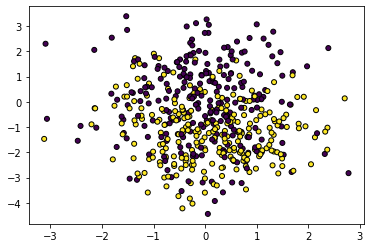

In [20]:
X, y = make_classification(n_samples = 500, n_features = 10, n_redundant = 2, n_informative = 4,n_clusters_per_class = 2, random_state = 14)
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c= y, s = 25, edgecolor = 'k')

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  

intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)  

In [24]:
def mini_batch_GD(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])
    l_rate = 0.001

    batch_size = int(0.1 * X.shape[0])
    for i in range(max_iter):
        ix = np.random.randint(0, X.shape[0]) 
        batch_X = X[ix:ix+batch_size]
        batch_y = y[ix:ix+batch_size]
        cost, grad = gradient(batch_X, batch_y, w)
        if i % 2000 == 0:
            print(f"Cost at iteration {i}", np.round(cost, 3))
        w = w - l_rate * grad
    return w, i

def gradient(X, y, w):
    m = X.shape[0]
    h = h_theta(X, w)
    error = h - y
    cost = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    grad = np.dot(X.T, error)
    return cost, grad

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
        
def h_theta(X, w):
    return sigmoid(X @ w)

def output(pred):
    return np.round(pred)

w, i = mini_batch_GD(X_train, y_train, max_iter = 10000)

Cost at iteration 0 24.26
Cost at iteration 2000 14.8
Cost at iteration 4000 14.885
Cost at iteration 6000 9.909
Cost at iteration 8000 17.762


In [25]:
yhat = output(h_theta(X_test, w))
print(classification_report(y_test, yhat))
print(roc_auc_score(y_test, yhat))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        67
           1       0.89      0.77      0.83        83

    accuracy                           0.82       150
   macro avg       0.82      0.83      0.82       150
weighted avg       0.83      0.82      0.82       150

0.8258406761373853


## Multinomial Logistic Regression

In [36]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target  

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1) 

In [46]:
model = LogisticRegression(multi_class = 'ovr')  
model.fit(X_train, y_train)
yhat = model.predict(X_test)

print("=========Average Precision Score=======")
y_test_binarized = label_binarize(y_test, classes = [0, 1, 2])
yhat_binarized   = label_binarize(yhat,   classes = [0, 1, 2])

n_classes = len(np.unique(y_test))
for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", np.round(class_score, 3))
print("==========Classification Report========")
print("Report: ", classification_report(y_test, yhat))

=========Average Precision Score=======
Class 0 score:  1.0
Class 1 score:  0.849
Class 2 score:  0.827
==========Classification Report========
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.93      0.87      0.90        15
           2       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



## Logistic Regression with Newton-Rhapson Method

Newton Raphson method is an alternative way to gradient descent in Logistic Regression. Instead of simply looking at each step on the slope, we take a second derivative to find the curvature towards the derivatives = 0. It is typically faster than normal gradient descent, but as the number of features grow, its performance can hurt due to matrix inverse and finding second derivatives.

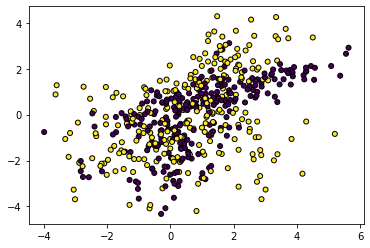

In [47]:
X, y = make_classification(n_samples = 500, n_features = 5, n_redundant = 1, n_informative = 4,
                             n_clusters_per_class = 2, random_state = 14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c = y, s = 25, edgecolor = 'k')

In [51]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis = 1)
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis = 1)  

def newton(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])
    l_rate = 0.01
    batch_size = int(0.1 * X.shape[0])
    for i in range(max_iter):
        ix = np.random.randint(0, X.shape[0])
        batch_X = X[ix:ix+batch_size]
        batch_y = y[ix:ix+batch_size]
        cost, second, first = newton_curve(batch_X, batch_y, w)
        if i % 500 == 0:
            print(f"Cost at iteration {i}", cost)
        H_inverse = np.linalg.pinv(second)
        w = w - l_rate * H_inverse @ first
    return w, i

def newton_curve(X, y, w):
    m = X.shape[0]
    h = h_theta(X, w)
    error = h - y
    cost = -(np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))) / m
    first = (1/m) * np.dot(X.T, error)
    second = X.T @ np.diag((h) * (1-h)) @ X
    return cost, second, first

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
        
def h_theta(X, w):
    return sigmoid(X @ w)

def output(pred):
    return np.round(pred)

w, i = newton(X_train, y_train, max_iter = 5000)

Cost at iteration 0 -0.6931471805599452
Cost at iteration 500 -0.6196898006101748
Cost at iteration 1000 -0.5279835407656427
Cost at iteration 1500 -0.48240895775915066
Cost at iteration 2000 -0.46313499444647976
Cost at iteration 2500 -0.49326254748606674
Cost at iteration 3000 -0.4763858621850478
Cost at iteration 3500 -0.4802486398823038
Cost at iteration 4000 -0.4653070854441237
Cost at iteration 4500 -0.4164912699432636


In [52]:
yhat = output(h_theta(X_test, w))
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.7522943722943723
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.82      0.80      0.81        75
           1       0.81      0.83      0.82        75

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



In [67]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.utils import shuffle

X, y1 = make_classification(n_samples=10, n_features=100,
                            n_informative=30, n_classes=3,
                            random_state=1)
y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)
Y = np.vstack((y1, y2, y3)).T
n_samples, n_features = X.shape 
n_outputs = Y.shape[1]
n_classes = 3

model = LogisticRegression(multi_class = 'ovr')  
multi_target_forest = MultiOutputClassifier(model, n_jobs = 2)
prediction = multi_target_forest.fit(X, Y).predict(X)